In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mag_manip
from scipy.special import erf
from sklearn.metrics import r2_score
from functions.functions import load_data_forGridSearch, feature_scaling_forGridSearch, save_object

In [2]:
cal_path = '../Code/baseline_model/magnetic_model/CalibrateSystem_CardioMag_retrained_w_SensorGrid/CardioMag_CalibrationCube_03-04-19.yaml'
#cal_path = '/home/samuelch/tesla_ws/src/mag_control/mpem/cal/C_Mag_Calibration_06-25-2015.yaml'
lin_model = mag_manip.ForwardModelMPEM()
lin_model.setCalibrationFile(cal_path)

In [3]:
X_test, y_test = load_data_forGridSearch("../Data", "test")

# Data From Saturation NLLS Fit

In [4]:
# these saturation parameters were obtained by a separate experiment and are hardcoded here
bv = np.array([0.0477, 0.0493, 0.0549, 0.0488, 0.0451, 0.0412, 0.0451, 0.0443])
av = np.array([22.5751, 15.3176, 13.3847, 19.3013, 17.4867, 24.9567, 31.1219, 24.6883])

In [6]:
sat_functions = [mag_manip.SaturationErf(np.array([np.sqrt(np.pi)/(2*b),b])) for a, b in zip(av, bv)]

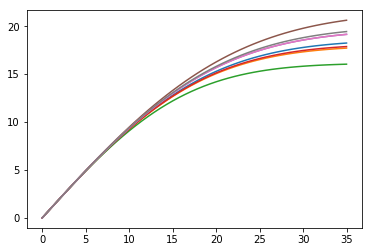

In [7]:
iv = np.linspace(0,35)
for sat_function in sat_functions:
    plt.plot(iv, [ sat_function.evaluate(i) for i in iv])

In [8]:
model = mag_manip.ForwardModelLinearSaturation()
model.setLinearModel(lin_model)
model.setSaturationFunctions(sat_functions)

In [9]:
y_pred_test = np.zeros((X_test.shape[0], 3))
for i in xrange(X_test.shape[0]):
    p = X_test[i,0:3]
    current = X_test[i,3:]
    y_pred_test[i,:] = np.squeeze(lin_model.computeFieldFromCurrents(p, current))

In [10]:
print("MPEM model R2 on testing set: " + str(r2_score(y_true = y_test, y_pred = y_pred_test)))

MPEM model R2 on testing set: 0.8093503187853169


In [11]:
y_pred_test = np.zeros((X_test.shape[0], 3))
for i in xrange(X_test.shape[0]):
    p = X_test[i,0:3]
    current = X_test[i,3:]
    y_pred_test[i,:] = np.squeeze(model.computeFieldFromCurrents(p, current))

In [12]:
print("S-MPEM model R2 on testing set: " + str(r2_score(y_true = y_test, y_pred = y_pred_test)))

S-MPEM model R2 on testing set: 0.9829903147838704


In [14]:
np.save( '../Models/S-MPEM/predictions_S-MPEM.npy', y_pred_test)

# Data From Saturation Measurements

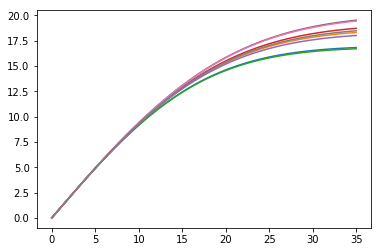

In [17]:
bv2 = np.array([0.05221493, 0.04753623, 0.05260759, 0.04635058, 0.04843163, 0.0441285, 0.04433791, 0.04705348])
#bv2 = np.array([0.05295739, 0.04715473, 0.05300138, 0.04571047, 0.04838074,
#       0.04306066, 0.04329089, 0.0466355])
sat_functions = [mag_manip.SaturationErf(np.array([np.sqrt(np.pi)/(2*b),b])) for b in bv2]
iv = np.linspace(0,35)
for sat_function in sat_functions:
    plt.plot(iv, [ sat_function.evaluate(i) for i in iv])
#bv = np.array([22.5751, 15.3176, 13.3847, 19.3013, 17.4867, 24.9567, 31.1219, 24.6883])

In [18]:
model = mag_manip.ForwardModelLinearSaturation()
model.setLinearModel(lin_model)
model.setSaturationFunctions(sat_functions)

In [19]:
y_pred_test = np.zeros((X_test.shape[0], 3))
for i in xrange(X_test.shape[0]):
    p = X_test[i,0:3]
    current = X_test[i,3:]
    y_pred_test[i,:] = np.squeeze(model.computeFieldFromCurrents(p, current))

In [20]:
print("S-MPEM model R2 on testing set: " + str(r2_score(y_true = y_test, y_pred = y_pred_test)))

S-MPEM model R2 on testing set: 0.9836311755976924
